## **Importing the necessary libraries**

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score


## **Loading the dataset**

In [7]:
import pandas as pd

# Load the dataset
df1 = pd.read_csv('/content/drive/MyDrive/E-commerce Website Logs.csv', low_memory=False)

# Create a copy of the dataframe
df = df1.copy()

# Display first few rows
print(df.head())

# Check column names
print(df.columns)


  accessed_date  duration_(secs) network_protocol             ip   bytes  \
0       43:57.2             2533            TCP     1.10.195.126   20100   
1       43:57.2             4034            TCP      1.1.217.211   20500   
2       43:26.1             1525            TCP    1.115.198.107   90100   
3       43:26.1             4572            TCP    1.121.152.143  100300   
4       17:09.0             3652            TCP    1.123.135.213  270200   

     accessed_Ffom age  gender country membership language     sales returned  \
0           Chrome  28  Female      CA     Normal  English  261.9600       No   
1  Mozilla Firefox  21    Male      AR     Normal  English  731.9400       No   
2  Mozilla Firefox  20    Male      PL     Normal  English   14.6200       No   
3  Mozilla Firefox  66  Female      IN     Normal  Spanish  957.5775       No   
4  Mozilla Firefox  53  Female      KR     Normal  Spanish   22.3680       No   

   returned_amount   pay_method  
0              0.0  Cr

## **Data Cleaning**

In [8]:
# Print column names before processing
print("Columns before processing:")
print(df.columns)

# Generate random integers between 18 and 69 for age imputation
random_values = np.random.randint(18, 70, size=len(df))

# Replace non-numeric values in 'age' with random values
df['age'] = pd.to_numeric(df['age'], errors='coerce')  # Convert existing numeric values
df['age'].fillna(pd.Series(random_values, index=df.index), inplace=True)

# Function to impute missing values
def impute_missing_values(df):
    for col in df.columns:
        if df[col].dtype == 'object':  # Categorical
            df[col].fillna(df[col].mode().iloc[0], inplace=True)  # Mode for categorical
        else:  # Numerical
            df[col].fillna(df[col].mean(), inplace=True)  # Mean for numerical
    return df

# Impute missing values in the copy
df_imputed = impute_missing_values(df.copy())

# Check column names after processing
print("\nColumns after processing:")
print(df.columns)

# Check for missing values after imputation
missing_values = df.isnull().sum()
print("\nMissing values after imputation:")
print(missing_values)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Display summary statistics
print("\nSummary statistics:")
print(df.describe())

Columns before processing:
Index(['accessed_date', 'duration_(secs)', 'network_protocol', 'ip', 'bytes',
       'accessed_Ffom', 'age', 'gender', 'country', 'membership', 'language',
       'sales', 'returned', 'returned_amount', 'pay_method'],
      dtype='object')

Columns after processing:
Index(['accessed_date', 'duration_(secs)', 'network_protocol', 'ip', 'bytes',
       'accessed_Ffom', 'age', 'gender', 'country', 'membership', 'language',
       'sales', 'returned', 'returned_amount', 'pay_method'],
      dtype='object')

Missing values after imputation:
accessed_date       0
duration_(secs)     0
network_protocol    0
ip                  0
bytes               0
accessed_Ffom       0
age                 0
gender              0
country             0
membership          0
language            0
sales               0
returned            0
returned_amount     0
pay_method          0
dtype: int64

Summary statistics:
       duration_(secs)          bytes            age          sales 

## **Exploratory Data Analysis(EDA)  and  Visualization**

### **Box Plots**

network_protocol


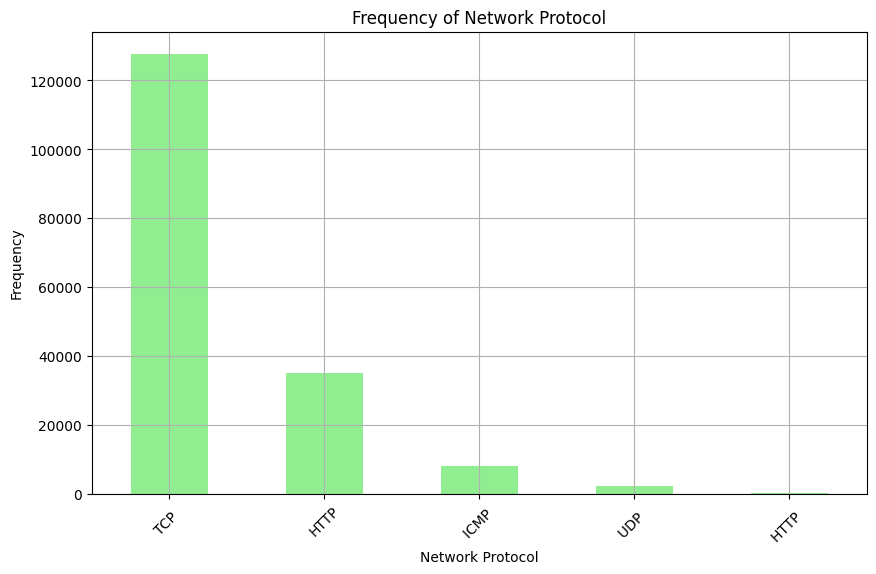

accessed_Ffom


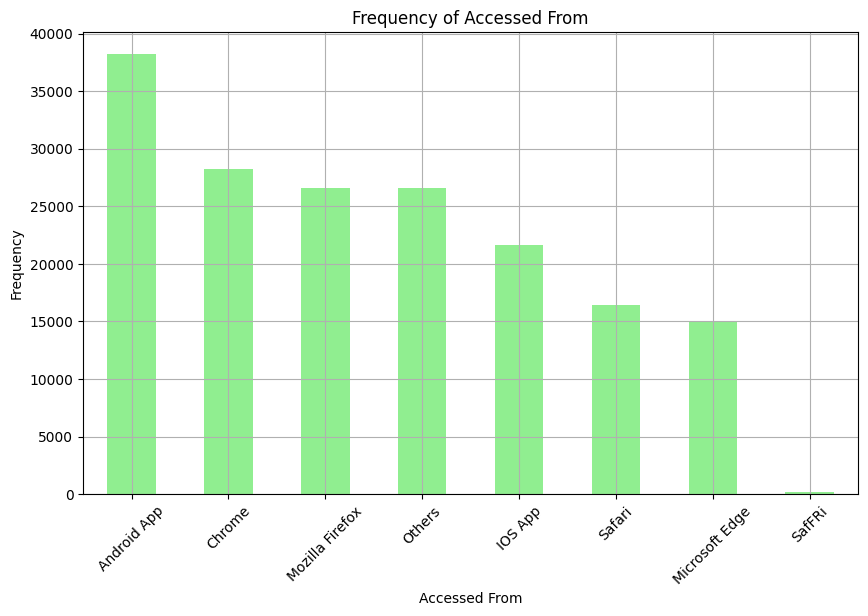

age


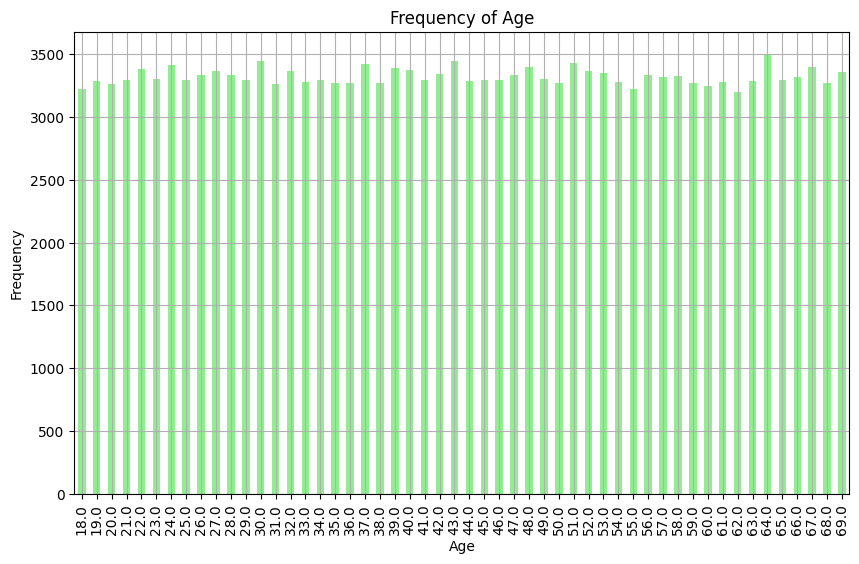

gender


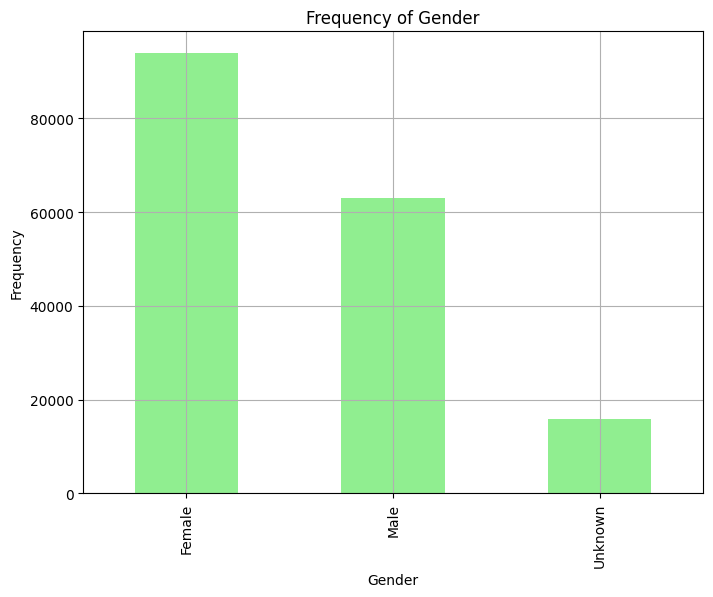

country


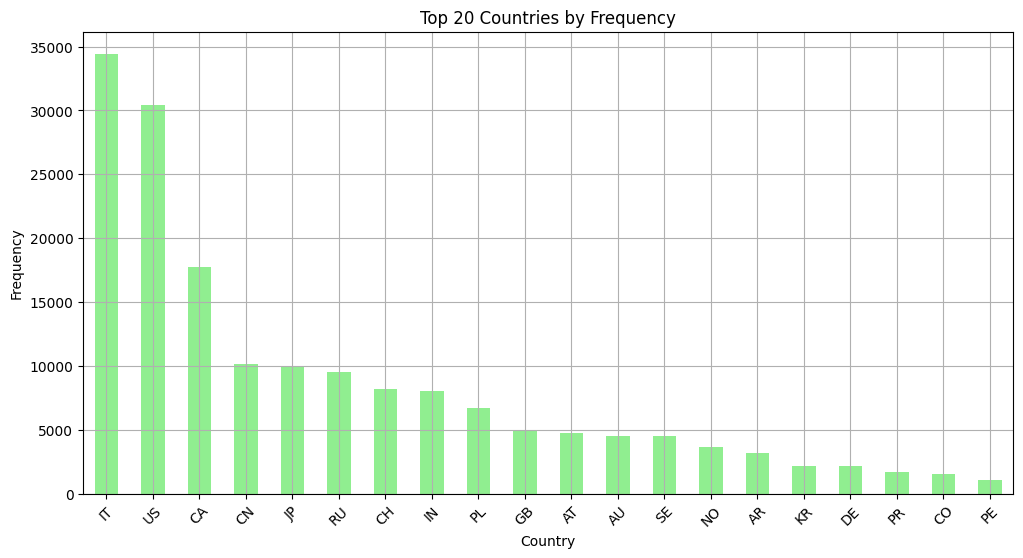

membership


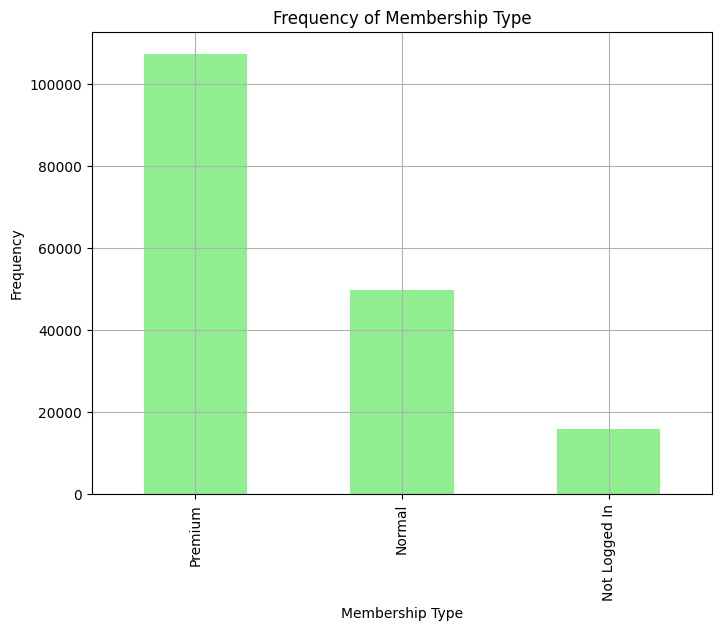

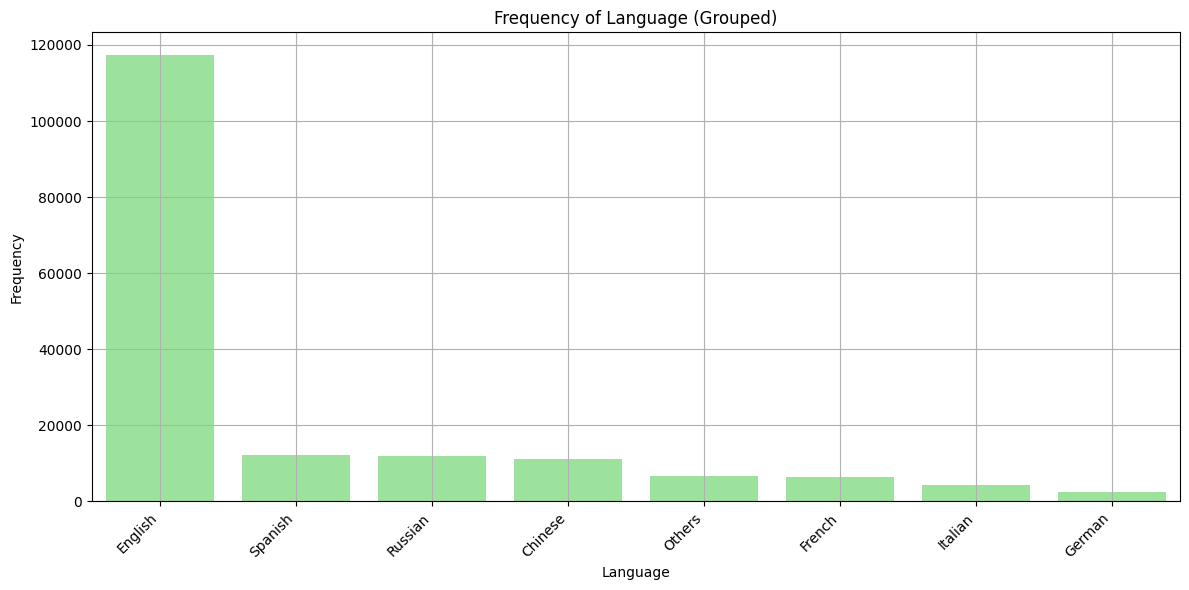

returned


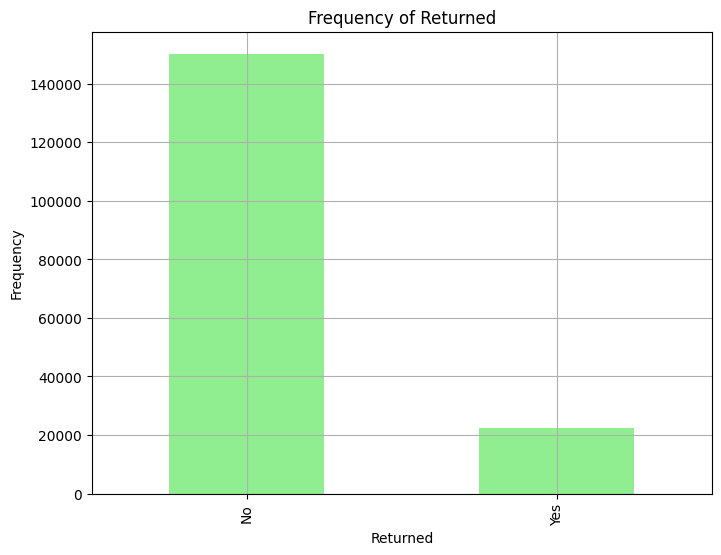

pay_method


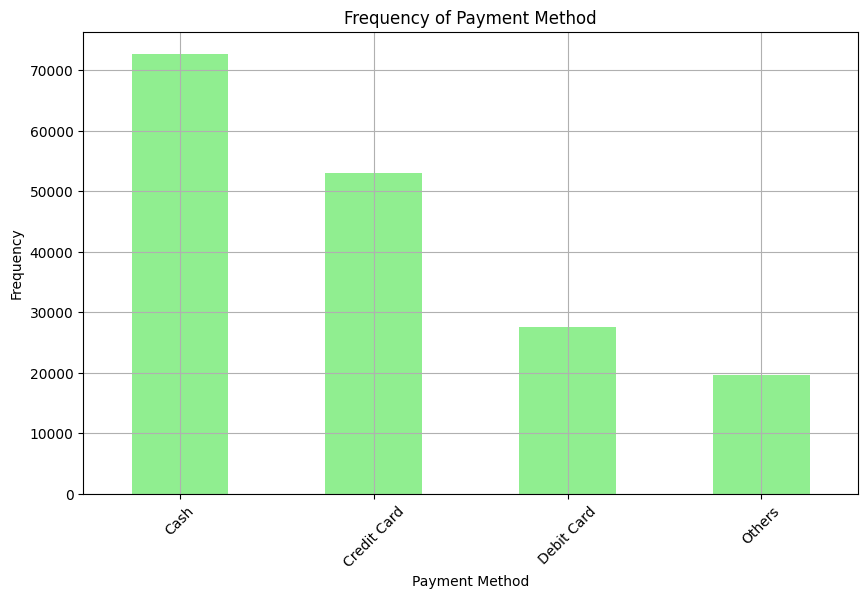

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print("network_protocol")
plt.figure(figsize=(10, 6))
df['network_protocol'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Frequency of Network Protocol')
plt.xlabel('Network Protocol')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

print("accessed_Ffom")

plt.figure(figsize=(10, 6))
df['accessed_Ffom'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Frequency of Accessed From')
plt.xlabel('Accessed From')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

print("age")
plt.figure(figsize=(10, 6))
df['age'].value_counts().sort_index().plot(kind='bar', color='lightgreen')
plt.title('Frequency of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

print("gender")
plt.figure(figsize=(8, 6))
df['gender'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Frequency of Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

print("country")
plt.figure(figsize=(12, 6))
df['country'].value_counts().head(20).plot(kind='bar', color='lightgreen')
plt.title('Top 20 Countries by Frequency')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


print("membership")
plt.figure(figsize=(8, 6))
df['membership'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Frequency of Membership Type')
plt.xlabel('Membership Type')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns

# Group small frequency languages into "Others"
threshold = 0.01 * len(df)  # Set threshold as 1% of the total count
language_counts = df['language'].value_counts()
languages_to_keep = language_counts[language_counts >= threshold].index
df['language_grouped'] = df['language'].apply(lambda x: x if x in languages_to_keep else 'Others')

# Plot the grouped bar chart
plt.figure(figsize=(12, 6))
sns.countplot(x='language_grouped', data=df, order=df['language_grouped'].value_counts().index, color='lightgreen')
plt.title('Frequency of Language (Grouped)')
plt.xlabel('Language')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensures all elements fit nicely in the figure
plt.grid(True)
plt.show()

print("returned")
plt.figure(figsize=(8, 6))
df['returned'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Frequency of Returned')
plt.xlabel('Returned')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

print("pay_method")
plt.figure(figsize=(10, 6))
df['pay_method'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Frequency of Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

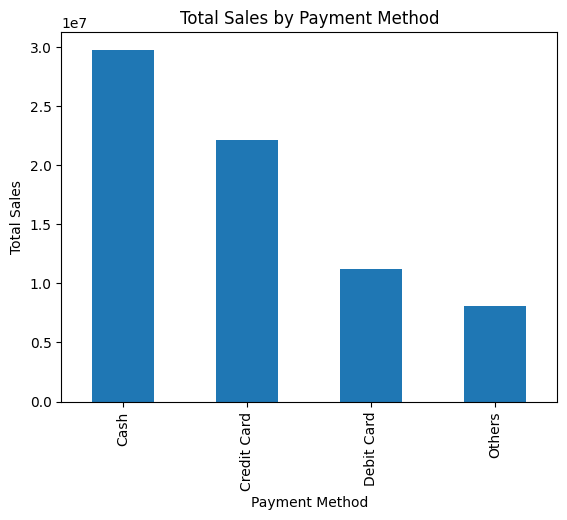

In [ ]:

# Sales by payment method
sales_by_payment_method = df.groupby('pay_method')['sales'].sum().sort_values(ascending=False)
sales_by_payment_method.plot(kind='bar')
plt.title('Total Sales by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Total Sales')
plt.show()


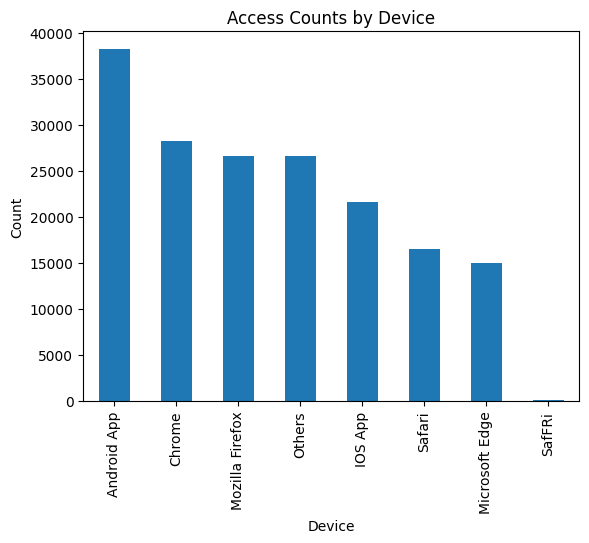

In [ ]:
# Access counts by device
df['accessed_Ffom'].value_counts().plot(kind='bar')
plt.title('Access Counts by Device')
plt.xlabel('Device')
plt.ylabel('Count')
plt.show()


**Box PLot and  Pie Chart**

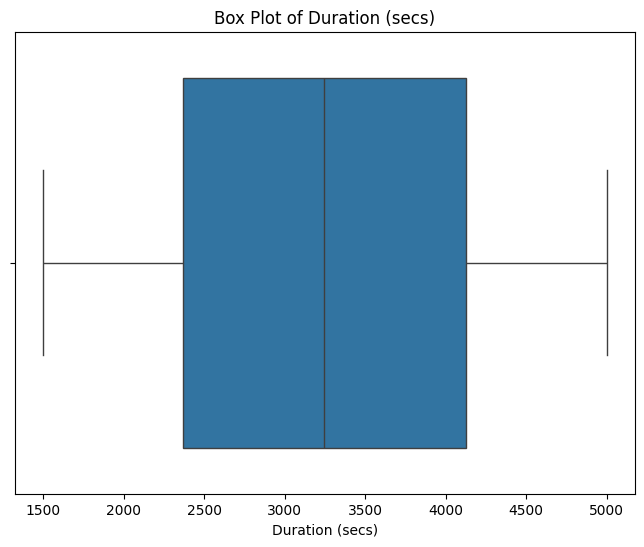

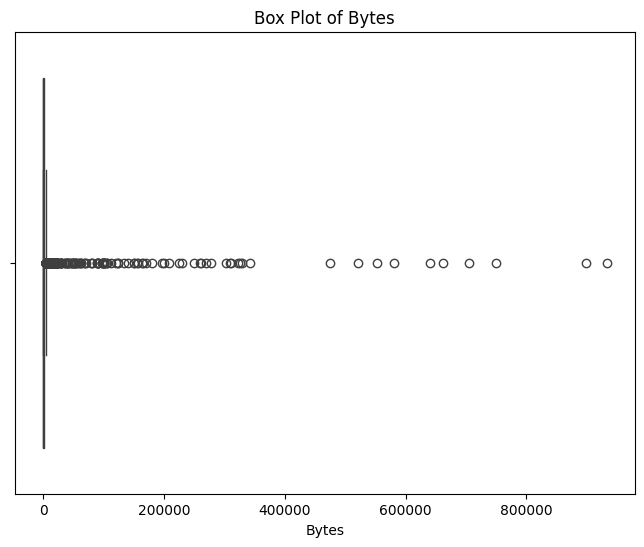

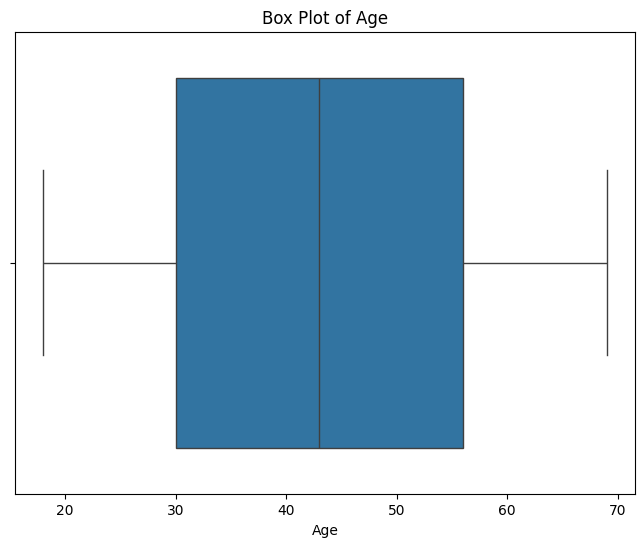

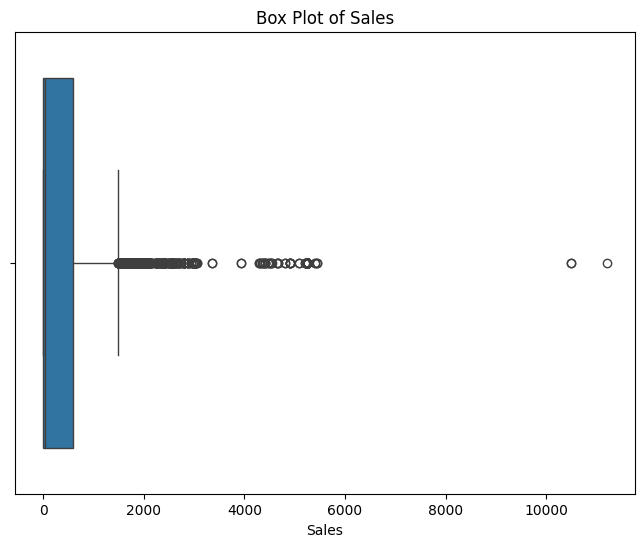

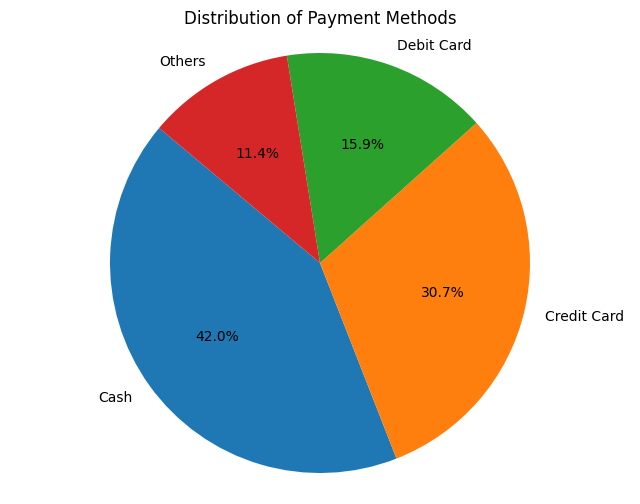

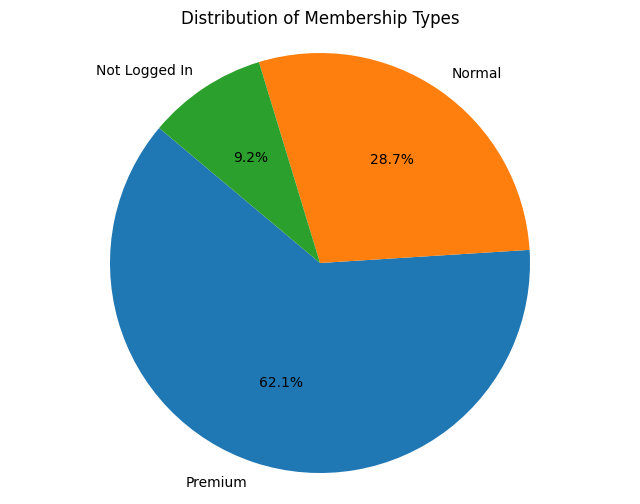

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame containing the dataset

# Box plot for duration_(secs)
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['duration_(secs)'])
plt.title('Box Plot of Duration (secs)')
plt.xlabel('Duration (secs)')
plt.show()

# Box plot for bytes
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['bytes'])
plt.title('Box Plot of Bytes')
plt.xlabel('Bytes')
plt.show()

# Box plot for age
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['age'])
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.show()

# Box plot for sales
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['sales'])
plt.title('Box Plot of Sales')
plt.xlabel('Sales')
plt.show()

# Pie chart for pay_method
pay_method_counts = df['pay_method'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(pay_method_counts, labels=pay_method_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Payment Methods')
plt.axis('equal')
plt.show()

# Pie chart for membership
membership_counts = df['membership'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(membership_counts, labels=membership_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Membership Types')
plt.axis('equal')
plt.show()


**HeatMap**

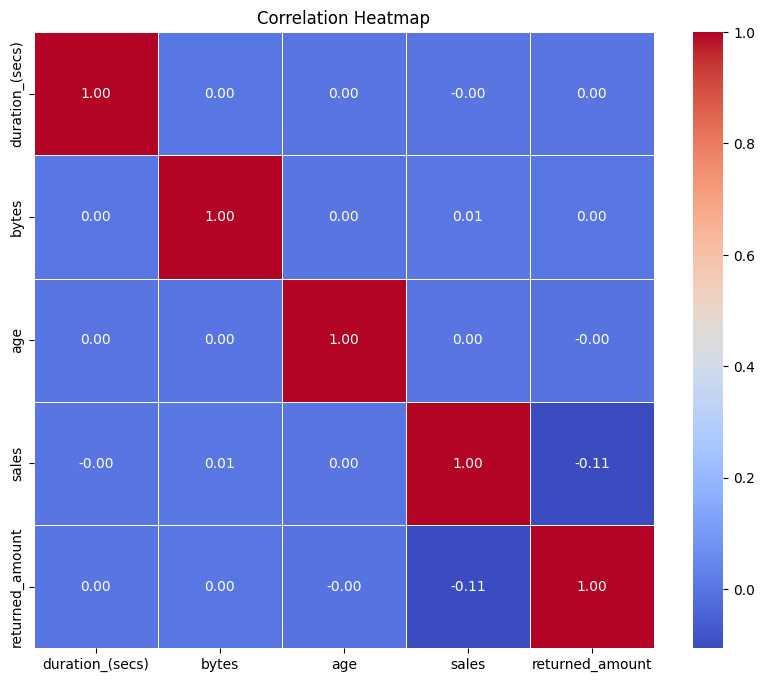

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Exclude non-numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix
corr_matrix = df[numeric_cols].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


### **Bivariate Analysis**

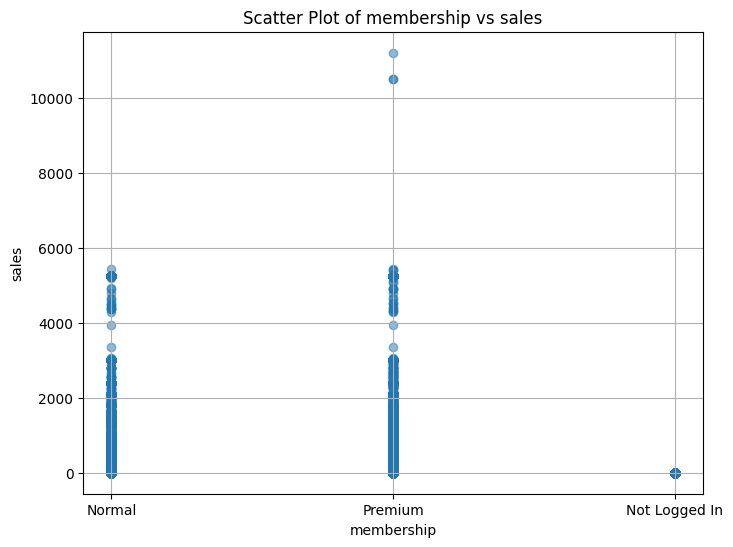

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot for membership vs 'sales'
plt.figure(figsize=(8, 6))
plt.scatter(df['membership'], df['sales'], alpha=0.5)
plt.title('Scatter Plot of membership vs sales')
plt.xlabel('membership')
plt.ylabel('sales')
plt.grid(True)
plt.show()


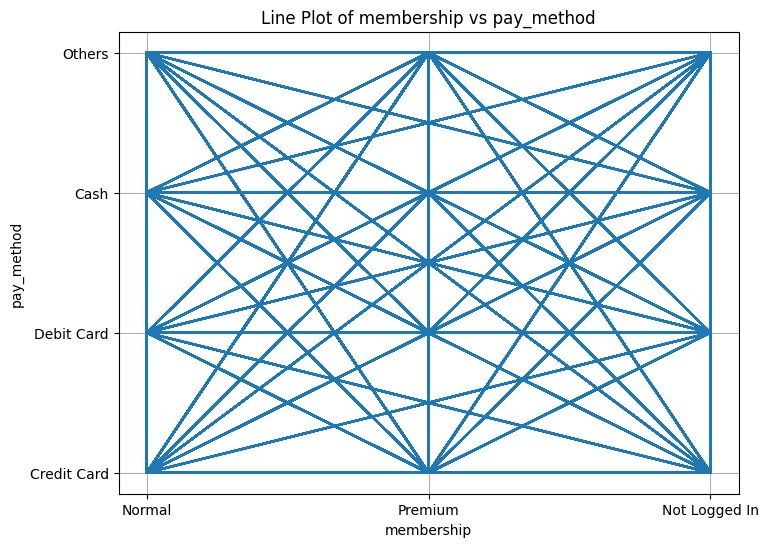

In [ ]:
# Line plot for 'membership' vs 'pay_method'
plt.figure(figsize=(8, 6))
plt.plot(df['membership'], df['pay_method'])
plt.title('Line Plot of membership vs pay_method')
plt.xlabel('membership')
plt.ylabel('pay_method')
plt.grid(True)
plt.show()


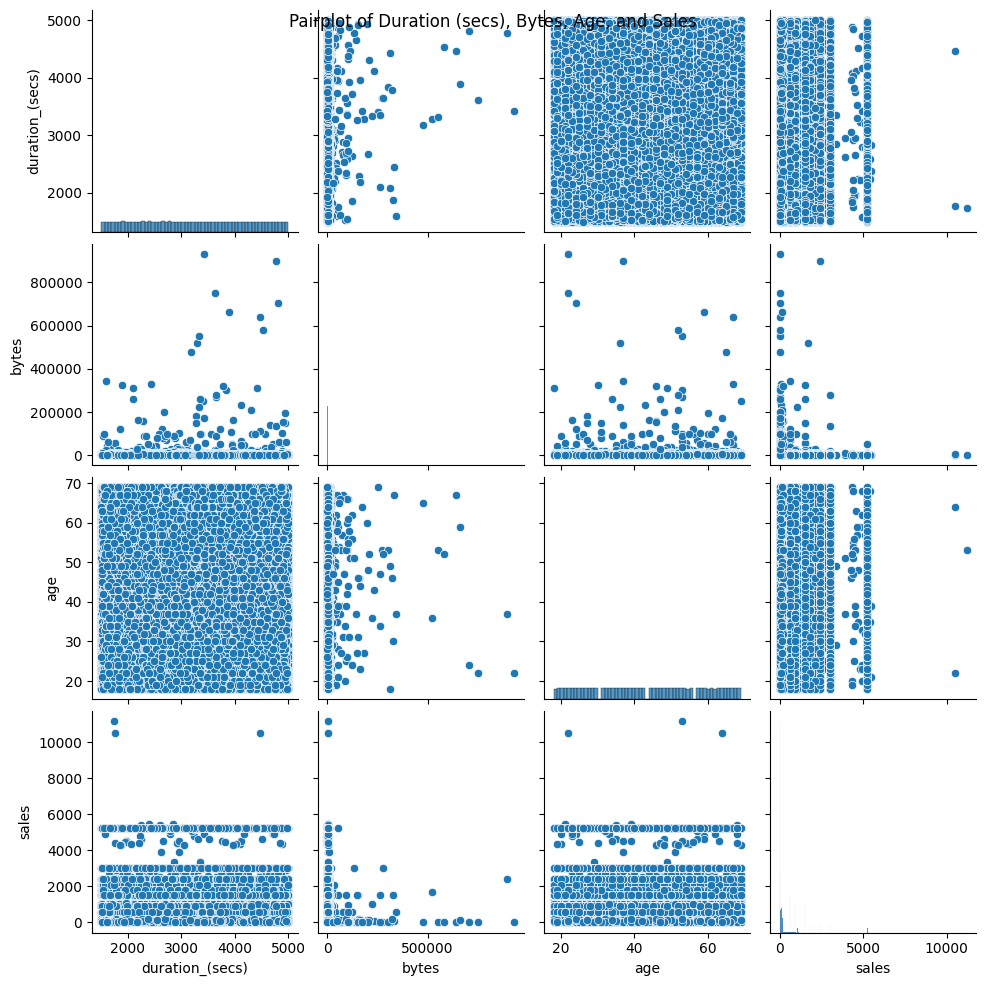

In [ ]:
# Pairplot of selected numerical variables
sns.pairplot(df[['duration_(secs)', 'bytes', 'age', 'sales']])
plt.suptitle('Pairplot of Duration (secs), Bytes, Age, and Sales')
plt.show()


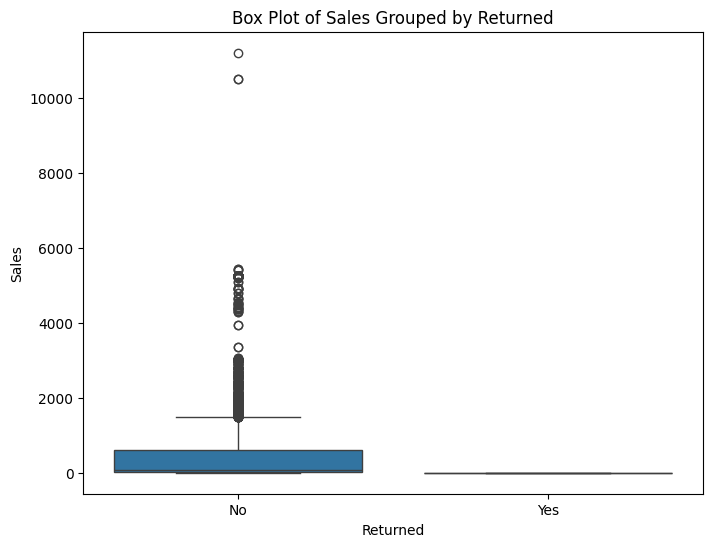

In [ ]:
import seaborn as sns

# Box plot of 'sales' grouped by 'returned'
plt.figure(figsize=(8, 6))
sns.boxplot(x='returned', y='sales', data=df)
plt.title('Box Plot of Sales Grouped by Returned')
plt.xlabel('Returned')
plt.ylabel('Sales')
plt.show()


## **Multivariate Analysis**

### **Scatter Matrix**

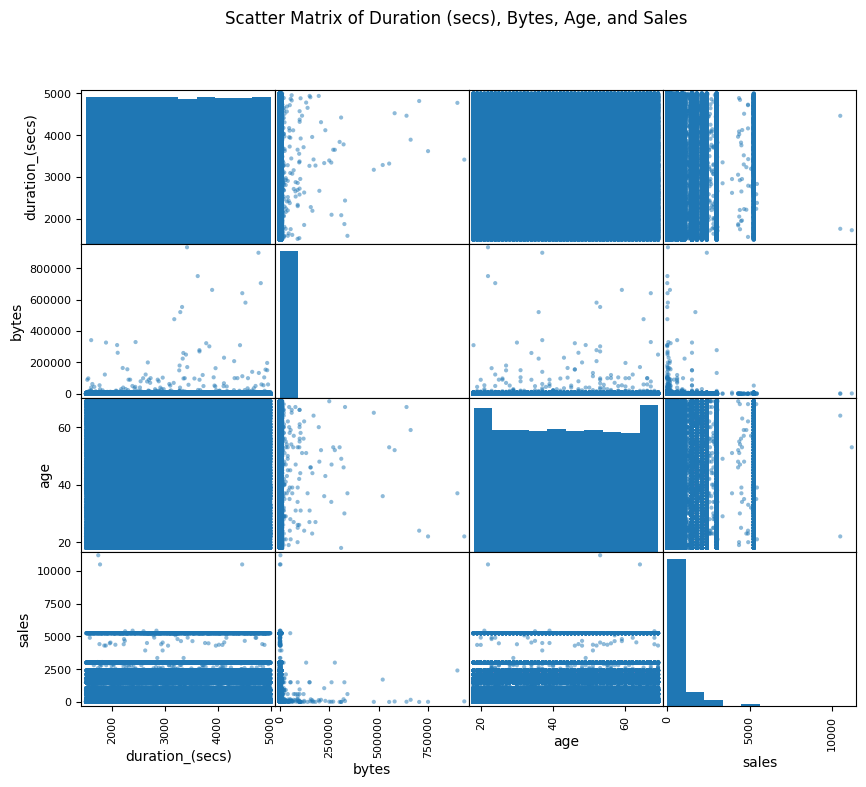

In [ ]:
from pandas.plotting import scatter_matrix

# Scatter matrix of selected numerical variables
scatter_matrix(df[['duration_(secs)', 'bytes', 'age', 'sales']], figsize=(10, 8))
plt.suptitle('Scatter Matrix of Duration (secs), Bytes, Age, and Sales')
plt.show()


## **Principal Component Analyis**

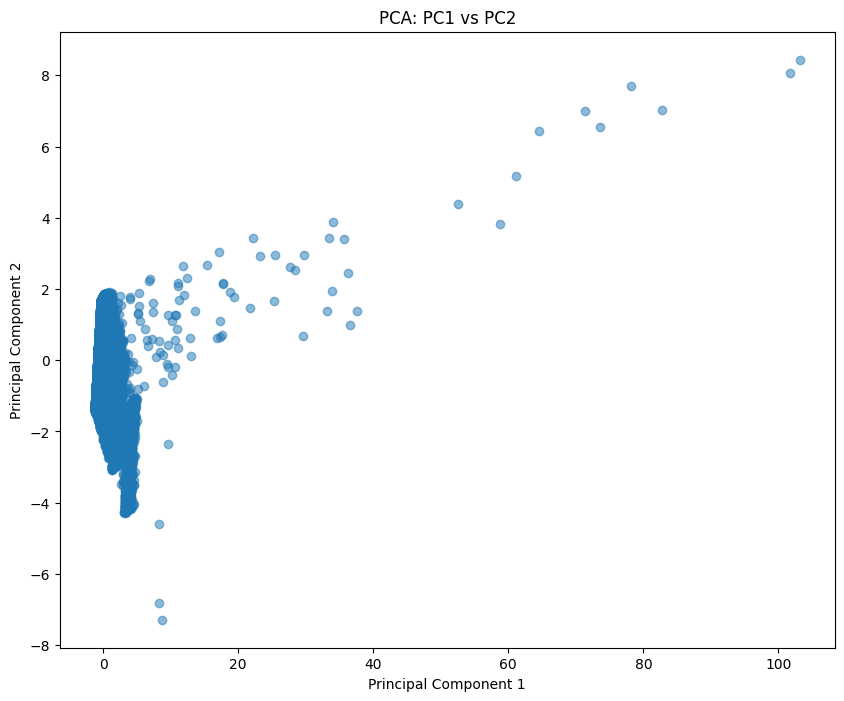

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Example of PCA
features = ['duration_(secs)', 'bytes', 'age', 'sales']
X = df[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3'])

# Plot the first two principal components
plt.figure(figsize=(10, 8))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5)
plt.title('PCA: PC1 vs PC2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


## **Sales Prediction**

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate unique membership values and assign numeric codes
membership_codes = {value: code for code, value in enumerate(df['membership'].unique())}

# Convert categorical membership to numeric for modeling
df['membership_code'] = df['membership'].map(membership_codes)

# Splitting data into features (X) and target (y)
X = df[['age', 'membership_code']]
y = df['sales']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'RandomForest': RandomForestRegressor(random_state=42),
    'LinearRegression': LinearRegression(),
    'GradientBoosting': GradientBoostingRegressor(random_state=42)
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    results[name] = {'model': model, 'y_pred': y_pred, 'mse': mse}
    print(f'{name} Mean Squared Error: {mse}')

# Print Mean Squared Error results
print("\nMean Squared Error results:")
for name, result in results.items():
    print(f'{name}: {result["mse"]}')




RandomForest Mean Squared Error: 611725.9911989307
LinearRegression Mean Squared Error: 620163.2397238541
GradientBoosting Mean Squared Error: 611385.6929973247

Mean Squared Error results:
RandomForest: 611725.9911989307
LinearRegression: 620163.2397238541
GradientBoosting: 611385.6929973247


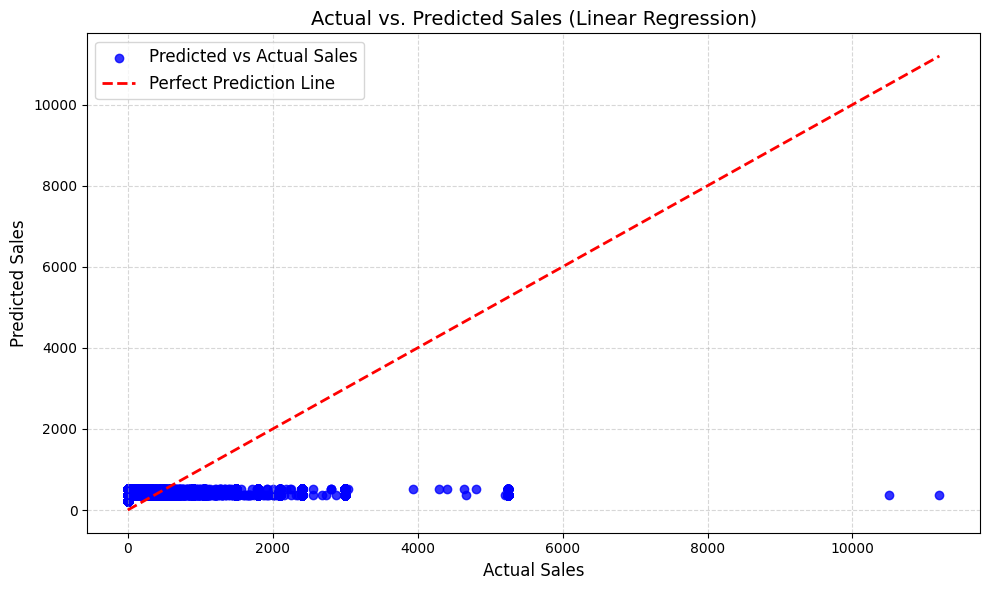

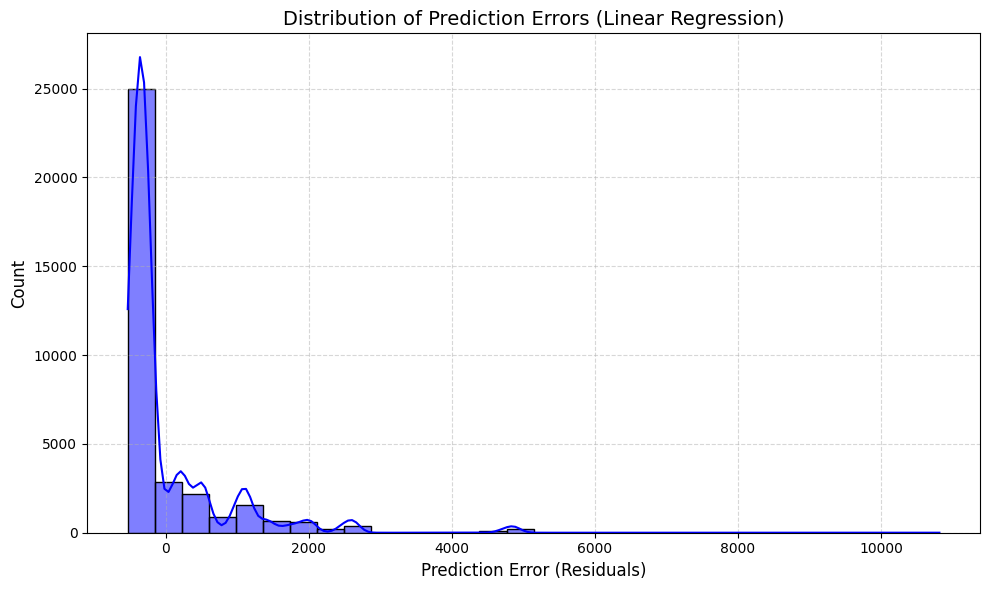

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, results['LinearRegression']['y_pred'], alpha=0.8, color='blue', label='Predicted vs Actual Sales')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2, label='Perfect Prediction Line')
plt.xlabel('Actual Sales', fontsize=12)
plt.ylabel('Predicted Sales', fontsize=12)
plt.title('Actual vs. Predicted Sales (Linear Regression)', fontsize=14)
plt.legend(loc='upper left', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


residuals = y_test - results['LinearRegression']['y_pred']

plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True, color='blue')
plt.xlabel('Prediction Error (Residuals)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Prediction Errors (Linear Regression)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [20]:
def predict_sales(age, membership):
    membership_code = membership_codes.get(membership, -1)  # Use -1 as default if membership is not found
    sample_X = pd.DataFrame({
        'age': [age],
        'membership_code': [membership_code]
    })
    predicted_sales = float(models['LinearRegression'].predict(sample_X)[0])  # Ensure it's cast to float
    return predicted_sales

# Example usage of predicting sales based on user input
print("\nEnter user inputs to predict sales:")
age_input = int(input("Enter age: "))
print(f"Available membership types: {list(membership_codes.keys())}")
membership_input = input("Enter membership type: ")

predicted_sales = predict_sales(age_input, membership_input)
print(f'\nPredicted sales for user inputs: {predicted_sales}')




Enter user inputs to predict sales:
Enter age: 18
Available membership types: [0, 2, 1]
Enter membership type: 0

Predicted sales for user inputs: 677.4260420242992


## **Customer Segmentation**

Enter the number of clusters: 4


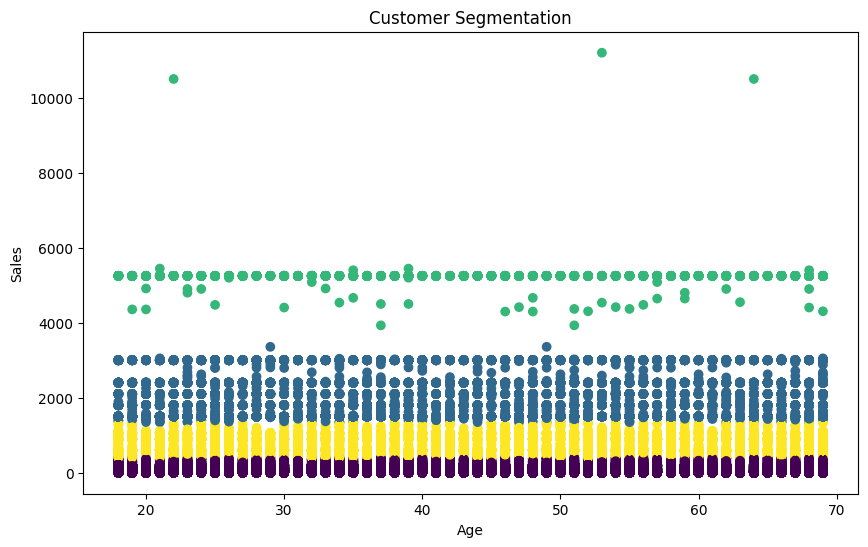

In [21]:
import warnings
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Suppress sklearn warning
warnings.filterwarnings("ignore", category=FutureWarning, module='sklearn')

# Assuming 'df' is your pandas DataFrame with the relevant data
X = df[['age', 'sales']]  # Adjust features as needed

# Take number of clusters as input from user
try:
    num_clusters = int(input("Enter the number of clusters: "))
except ValueError:
    print("Invalid input. Defaulting to 3 clusters.")
    num_clusters = 3

# Apply K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

# Visualize clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['sales'], c=df['cluster'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Sales')
plt.title('Customer Segmentation')
plt.show()


## **Recommendation**

In [23]:
!pip install scikit-surprise


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357242 sha256=6e4f79195704d839ae0eaacb11b1007a3b1bfbb8dec2e50671feae22f6e05a51
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [24]:
import pandas as pd
from surprise import Dataset, Reader, SVD
from surprise.accuracy import rmse


# Function to transform data to Surprise format
def transform_data(df):
    df['user_id'] = df.apply(lambda row: f"{row['network_protocol']}_{row['accessed_Ffom']}_{row['ip']}_{row['bytes']}_{row['duration_(secs)']}_{row['returned']}_{row['age']}", axis=1)
    df['item_id'] = df['pay_method']
    df['rating'] = 1  # Set a default rating for each pair, as it's not a traditional rating scenario
    return df[['user_id', 'item_id', 'rating']]

# Apply transformation
df_transformed = transform_data(df)

# Load data into Surprise format
reader = Reader(rating_scale=(1, 1))  # Rating scale can be adjusted, but in this case, it's binary (1 for recommended)
data = Dataset.load_from_df(df_transformed[['user_id', 'item_id', 'rating']], reader)

# Build and train the recommender model (SVD example)
model = SVD()
model.fit(data.build_full_trainset())

# Function to recommend payment method based on user inputs
def recommend_payment_method(network_protocol, accessed_Ffom, ip, bytes, duration, returned, age):
    user_id = f"{network_protocol}_{accessed_Ffom}_{ip}_{bytes}_{duration}_{returned}_{age}"

    # Get all payment methods available in the dataset
    all_methods = df['pay_method'].unique()

    # Predict ratings for each payment method for the user
    predictions = []
    for method in all_methods:
        predictions.append((method, model.predict(user_id, method).est))

    # Sort predictions by estimated rating (descending)
    predictions.sort(key=lambda x: x[1], reverse=True)

    # Get the best recommended payment method
    best_method = predictions[0][0]

    return best_method

# Example usage
network_protocol_input = input("Enter network protocol (e.g., TCP, UDP): ")
accessed_from_input = input("Enter accessed from (e.g., Chrome, Firefox): ")
ip_input = input("Enter IP address: ")
bytes_input = int(input("Enter bytes transferred: "))
duration_input = int(input("Enter duration in seconds: "))
returned_input = input("Returned (Yes/No): ")
age_input = int(input("Enter age: "))

recommended_payment_method = recommend_payment_method(network_protocol_input, accessed_from_input, ip_input, bytes_input, duration_input, returned_input, age_input)

print("\nRecommended Payment Method:")
print(recommended_payment_method)


Enter network protocol (e.g., TCP, UDP): UDP
Enter accessed from (e.g., Chrome, Firefox): Chrome
Enter IP address: 1.101.204.11
Enter bytes transferred: 3023
Enter duration in seconds: 3002
Returned (Yes/No): No
Enter age: 34

Recommended Payment Method:
Credit Card
